# Movies Dataset Data Cleaning and Preprocessing

This notebook performs data cleaning and preprocessing on the MoviesOnStreamingPlatforms dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
df = pd.read_csv('MoviesOnStreamingPlatforms.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

## Data Cleaning

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16130 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


### Handle Age Missing Values

In [7]:
df["Age"].isnull().sum()

9390

In [8]:
# age_mode = df["Age"].mode()[0]
df["Age"] = df["Age"].fillna("Unknown")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16130 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


### Handle IMDb Missing Values

In [10]:
df["IMDb"].describe()

count    16173.000000
mean         5.902751
std          1.347867
min          0.000000
25%          5.100000
50%          6.100000
75%          6.900000
max          9.300000
Name: IMDb, dtype: float64

In [11]:
Q1 = df["IMDb"].quantile(0.25)
Q3 = df["IMDb"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

has_outliers = ((df["IMDb"] < lower) | (df["IMDb"] > upper)).any()

In [12]:
imdb_fill = df["IMDb"].median() if has_outliers else df["IMDb"].mean()
df["IMDb"] = df["IMDb"].fillna(imdb_fill)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  object 
 4   IMDb             16744 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16130 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


### Handle Rotten Tomatoes Missing Values

In [14]:
df["Rotten Tomatoes"] = (
    df["Rotten Tomatoes"]
    .astype(str)
    .str.replace("%", "", regex=False)
)

df["Rotten Tomatoes"] = pd.to_numeric(
    df["Rotten Tomatoes"], errors="coerce"
)
df["Rotten Tomatoes"] = df["Rotten Tomatoes"] / 10

In [15]:
rt_median = df["Rotten Tomatoes"].median()
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].fillna(rt_median)

In [16]:
# df["Rotten Tomatoes"].isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  object 
 4   IMDb             16744 non-null  float64
 5   Rotten Tomatoes  16744 non-null  float64
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16130 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 2.0+ MB


### Handle Categorical Missing Values

In [17]:
cat_cols = ["Directors", "Genres", "Country", "Language"]

df[cat_cols] = df[cat_cols].fillna("Unknown")

In [18]:
df[cat_cols].isnull().sum()

Directors    0
Genres       0
Country      0
Language     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  object 
 4   IMDb             16744 non-null  float64
 5   Rotten Tomatoes  16744 non-null  float64
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16744 non-null  object 
 12  Genres           16744 non-null  object 
 13  Country          16744 non-null  object 
 14  Language         16744 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 2.0+ MB


### Handle Runtime Missing Values and Categorization

In [20]:
df['Runtime'].isnull().sum()

592

In [21]:
df['Runtime'] = df['Runtime'].fillna(df['Runtime'].median())
# df['Runtime'] = df['Runtime'].fillna(0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  object 
 4   IMDb             16744 non-null  float64
 5   Rotten Tomatoes  16744 non-null  float64
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16744 non-null  object 
 12  Genres           16744 non-null  object 
 13  Country          16744 non-null  object 
 14  Language         16744 non-null  object 
 15  Runtime          16744 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 2.0+ MB


In [23]:
def runtime_category(x):
    if x == 0:
        return "Unknown"
    elif x < 60:
        return "Short Movie"
    elif x <= 120:
        return "Long Movie"
    else:
        return "Series"

df["Runtime_Category"] = df["Runtime"].apply(runtime_category)

In [24]:
df["Runtime_Category"].value_counts()

Runtime_Category
Long Movie     13843
Series          1682
Short Movie     1219
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                16744 non-null  int64  
 1   Title             16744 non-null  object 
 2   Year              16744 non-null  int64  
 3   Age               16744 non-null  object 
 4   IMDb              16744 non-null  float64
 5   Rotten Tomatoes   16744 non-null  float64
 6   Netflix           16744 non-null  int64  
 7   Hulu              16744 non-null  int64  
 8   Prime Video       16744 non-null  int64  
 9   Disney+           16744 non-null  int64  
 10  Type              16744 non-null  int64  
 11  Directors         16744 non-null  object 
 12  Genres            16744 non-null  object 
 13  Country           16744 non-null  object 
 14  Language          16744 non-null  object 
 15  Runtime           16744 non-null  float64
 16  Runtime_Category  16744 non-null  object

In [26]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime_Category
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Series
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Series
2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Series
3,4,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Long Movie
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Series


In [27]:
print("Unique Age values:", df['Age'].unique())
print("Age value counts:")
print(df['Age'].value_counts())

Unique Age values: ['13+' '18+' '7+' 'Unknown' 'all' '16+']
Age value counts:
Age
Unknown    9390
18+        3474
7+         1462
13+        1255
all         843
16+         320
Name: count, dtype: int64


In [28]:
df.to_csv("cleaned_movie_dataset.csv", index=False)

## Exploratory Data Analysis (EDA)

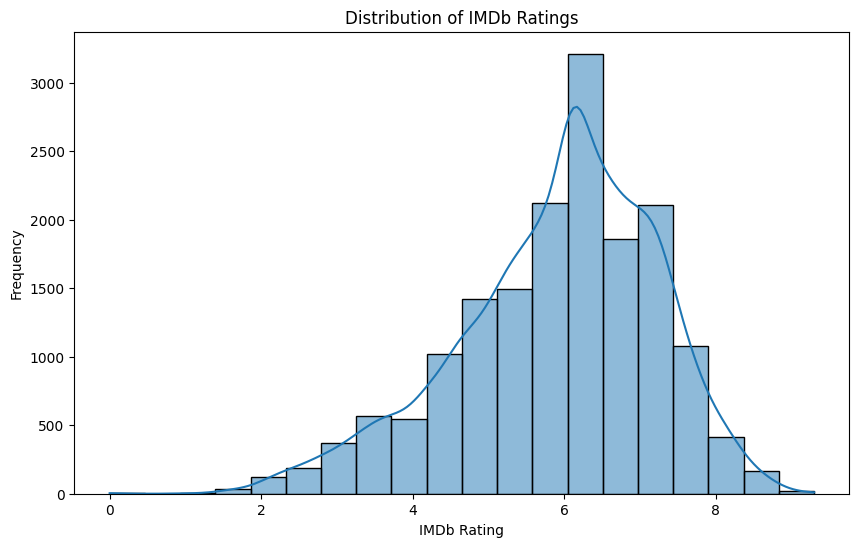

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

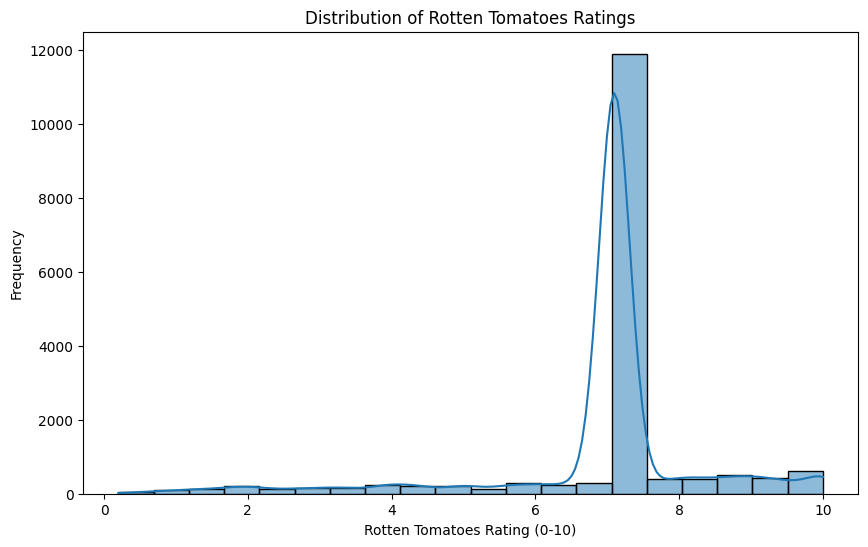

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rotten Tomatoes'], bins=20, kde=True)
plt.title('Distribution of Rotten Tomatoes Ratings')
plt.xlabel('Rotten Tomatoes Rating (0-10)')
plt.ylabel('Frequency')
plt.show()

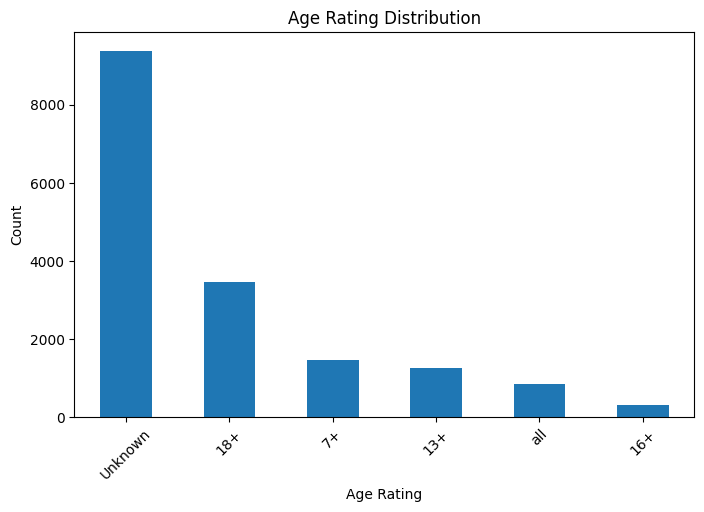

In [31]:
plt.figure(figsize=(8, 5))
df['Age'].value_counts().plot(kind='bar')
plt.title('Age Rating Distribution')
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

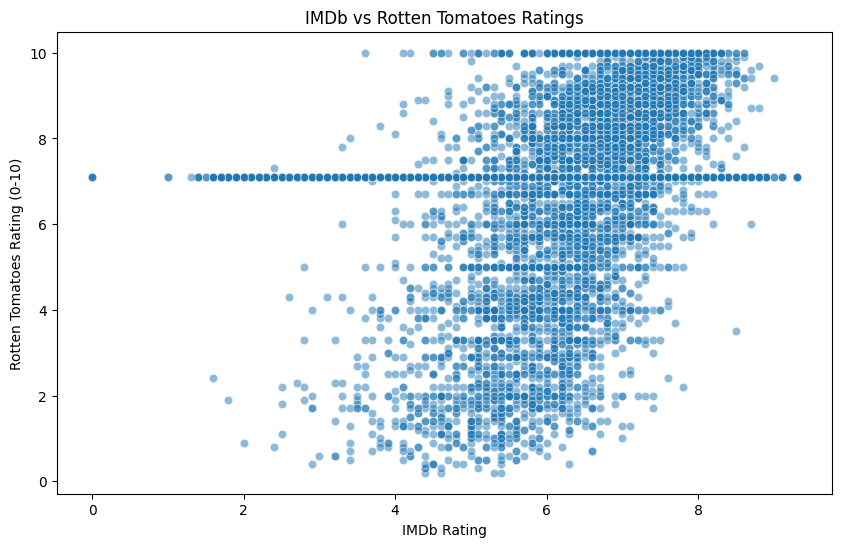

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDb', y='Rotten Tomatoes', data=df, alpha=0.5)
plt.title('IMDb vs Rotten Tomatoes Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Rating (0-10)')
plt.show()

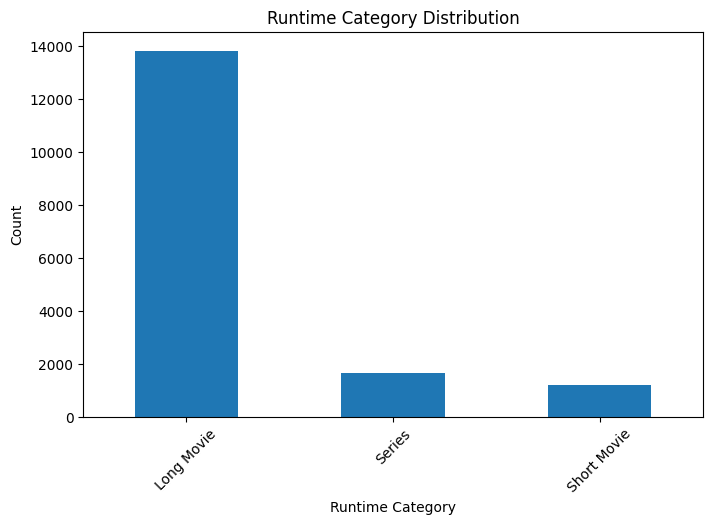

In [33]:
plt.figure(figsize=(8, 5))
df['Runtime_Category'].value_counts().plot(kind='bar')
plt.title('Runtime Category Distribution')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Conclusion

The dataset has been successfully cleaned and preprocessed. All missing values have been handled appropriately:
- Unnamed columns removed.
- Age filled with mode.
- IMDb filled with median if outliers present, else mean.
- Rotten Tomatoes converted to 0-10 scale and filled with median.
- Categorical columns filled with "Unknown".
- Runtime filled with median and categorized into Short Movie, Long Movie, and Series.

Basic EDA visualizations have been added to understand distributions and relationships.

The data is now ready for further analysis or modeling.